# Data Visualization of 911 Call Data

This is an analysis of the 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).
The data contains the following fields:

* lat: String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable

In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## New Reason Column

The 'title' column contains useful information, but currently in the dataset it is a long string which includes a description of why the person called 911. So I want to separate the reason from the description.
For example, in 'EMS: BACK PAINS/INJURY', the new 'Reason' column would only show 'EMS'.

In [7]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

Most common reason for a 911 call:

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Visualization of the number of 911 calls per reason:

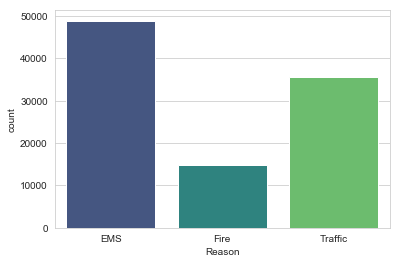

In [9]:
sns.countplot(x='Reason', data=df, palette='viridis')

Through this count plot we can see that 'EMS' was the most frequent reason that people called 911.

## Time Information 

Insights can probably be obtained using the 'timeStamp' column to determine when a the reason for the call was most likely to occur. To use the 'timeStamp information effectively, I will separate it into 'Month', 'Day', and 'Hour' into new columns.

In [10]:
type(df['timeStamp'].iloc[0])

str

I will use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Test to see if this works:

In [12]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
time = df['timeStamp'].iloc[0]

In [21]:
print(time.year, time.month, time.day, time.hour, time.minute, time.second)

2015 12 10 17 40 0


In [22]:
time.dayofweek

3

Ok great it works! Now I will continue creating the new columns.

In [23]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Change the day of the week from a number to its actual name.

In [24]:
dayname = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [25]:
df['Day of Week'] = df['Day of Week'].map(dayname)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thurs
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thurs
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thurs
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thurs
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thurs


Visualization of the 'Day of Week' column based off of the 'Reason' column:

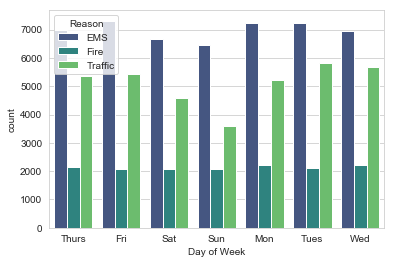

In [26]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

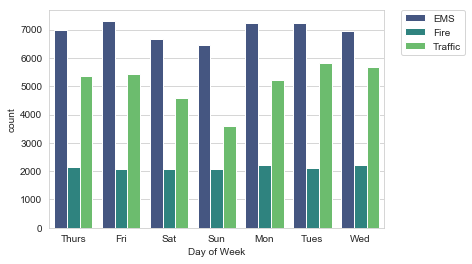

In [28]:
#relocate the legend
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This count plot shows us that the calls for 'EMS' and 'Fire' stays relatively the same throughout the week, while the calls for 'Traffic' is lowest on a Sunday. This makes sense as less people drive during the weekend. 

Now I'll do the same thing for the 'Month':

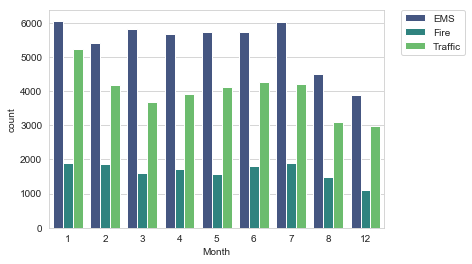

In [31]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Why is it missing months 9 to 11? I will try out other plots to see if I can visualize what is going on for the missing months.

To do this I will create a groupby object to group the dataframe by the month column and use the count() method to count how many instances of each occurred in each month. 

In [32]:
byMonth = df.groupby('Month').count()

In [34]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


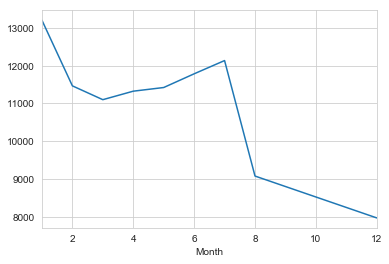

In [50]:
byMonth['Reason'].plot()

Here we can see that the calls dramatically drop in number in the later months of the year. So even though the aggregation of the months data doesn't seem to show us what is happening in the later months, we can still see the dropping trend, and this matches the previous count plot I showed.

## New Date Column

I will create a new 'Date' column that contains the date from the timeStamp column to see if any insights can be gained from it:

In [37]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [45]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thurs,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thurs,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thurs,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thurs,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thurs,2015-12-10


In [46]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


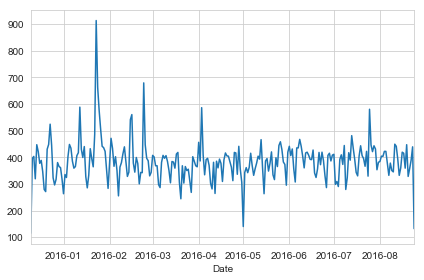

In [53]:
df.groupby('Date').count()['Reason'].plot()
plt.tight_layout()

I'm also curious to know the number of calls for each individual reason so I will make a plot separately for Traffic, Fire, and EMS:

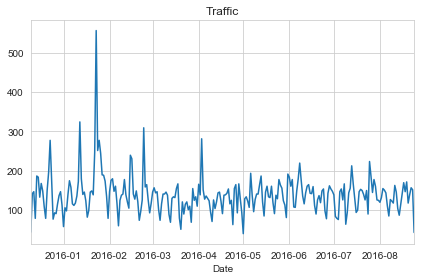

In [54]:
df[df['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot()
plt.title('Traffic')
plt.tight_layout()

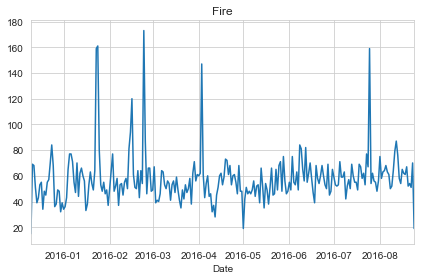

In [55]:
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot()
plt.title('Fire')
plt.tight_layout()

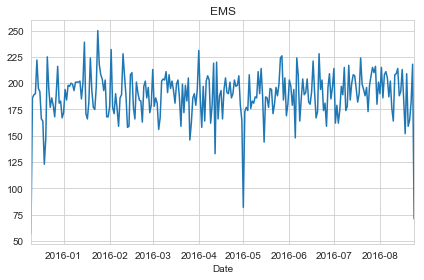

In [56]:
df[df['Reason']=='EMS'].groupby('Date').count()['Reason'].plot()
plt.title('EMS')
plt.tight_layout()

These plots show us there are certain spikes of when 911 is called depending on the date and reason.

## Heatmap Visualization 

An interesting way to visualize the data is using the heatmap matrix plot. 

The 'unstack' method allows us to reorganize the dataframe so that the columns become the 'Hour' and the index because the 'Day of Week'.

In [63]:
df.groupby(by=['Day of Week', 'Hour']).count().head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201

In [64]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].head()

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
Name: Reason, dtype: int64

In [61]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

In [62]:
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thurs,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


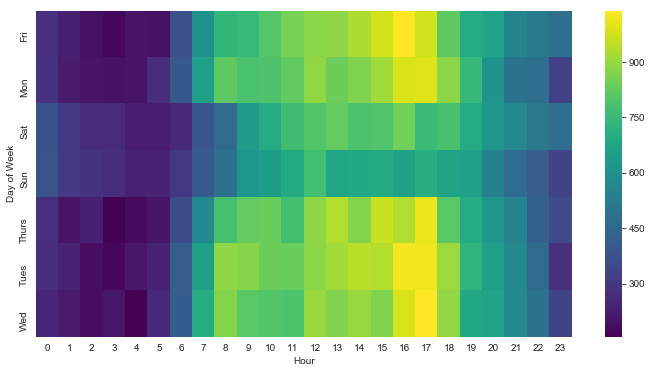

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

This heatmap shows us that the most 911 calls are made during around 7am to 7pm. That makes sense because that is the time people are out and about and not sleeping. We can also see that during 7am to 7pm, the weekends are the least likely day that people would call 911.